# Laboratorio 2

## Desarrollo de una herramienta anal√≠tica usando paquetes especializados para an√°lisis de datos en Python

Para el desarrollo de esta actividad puedes utilizar cualquier librer√≠a externa. Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el prop√≥sito global de la actividad y puedas desarrollar tu soluci√≥n apuntando a √©l desde el inicio.

Al desarrollar este laboratorio pondr√°s a prueba tus habilidades para:

1. Identificar y abordar preguntas de negocio y de *analytics*.
2. Leer datos desde archivos y almacenarlos utilizando m√©todos de librer√≠as especializadas.
3. Explorar, modificar, limpiar y unir objetos tablas de datos.
4. Implementar an√°lisis combinando m√©tricas descriptivas, visualizaci√≥n, filtrado y agrupaci√≥n.
5. Implementar an√°lisis basado en modelos estad√≠sticos o de *machine learning*.

##  Contexto: desigualdad y factores de √©xito en pruebas Saber 11 en Colombia

El ICFES es el Instituto Colombiano para el Fomento de la Educaci√≥n Superior y est√° adscrito al Ministerio de Educaci√≥n a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas Saber 11, las cuales eval√∫an a todos los estudiantes del pa√≠s al final de su educaci√≥n secundaria. El examen contiene preguntas que eval√∫an una variedad de √°reas del conocimiento (ej., matem√°ticas, f√≠sica, ingl√©s, etc.) y se lleva a cabo dos veces al a√±o, ajust√°ndose a los diferentes calendarios acad√©micos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes diligencian un formulario que recoge informaci√≥n sociodemogr√°fica y relacionada con la instituci√≥n a la que pertenecen. El fin es obtener informaci√≥n con respecto al desempe√±o de los estudiantes en la prueba y de sus caracter√≠sticas.

Al igual que otros pa√≠ses de la regi√≥n, Colombia tiene grandes retos en t√©rminos de desigualdad, particularmente en el contexto de educaci√≥n primaria y secundaria. Por esta raz√≥n, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las pruebas Saber 11, pues con ellos se pueden generar an√°lisis sobre la calidad de la educaci√≥n en el pa√≠s y eventualmente dar lugar a recomendaciones sobre pol√≠ticas p√∫blicas. En particular, la problem√°tica a abordar en este caso de estudio es la desigualdad y factores de √©xito en las pruebas Saber 11. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber 11, generar un reporte acerca de sus caracter√≠sticas principales y seleccionar las partes de dicho contenido que podr√≠an ser relevantes para el an√°lisis.


* Identificar caracter√≠sticas de las variables de inter√©s y relaciones entre ellas, por ejemplo, a trav√©s de agrupaci√≥n, visualizaciones y estad√≠sticas descriptivas.


* Proponer un modelo que busque relacionar las variables de inter√©s con el desempe√±o de los estudiantes y concluir acerca de los posibles hallazgos que se podr√≠an reportar para el *stakeholder*.


* Generar una herramienta que permita a un usuario interactuar con alguno de los par√°metros del an√°lisis realizado de forma relevante en el contexto del problema.

## Fase 1: obtener e inspeccionar archivos

En esta fase te har√°s una idea general del contenido de los datos y generar√°s un reporte al respecto (ej., imprimiendo mensajes, presentando tablas de resumen, etc.). Adem√°s, seleccionar√°s un segmento de los datos que consideres √∫til para realizar tu an√°lisis.

Pautas generales:

* Utilizar una librer√≠a especializada para leer los archivos de datos y agregarlos seg√∫n sea necesario (ej., utilizando los m√©todos `append` o `concat` si eliges cargarlos utilizando la librer√≠a `pandas`).
* Inspeccionar el archivo a partir de sus encabezados, columnas y descripciones de las variables seg√∫n su tipo (ej., num√©ricas, categ√≥ricas).
* Declarar una estructura de datos (ej., una lista) para almacenar un subconjunto de variables que puedan ser relevantes para la problem√°tica de inter√©s.

Preguntas gu√≠a:

* ¬øQu√© dimensiones tienen los datos?
* ¬øCon cu√°ntos a√±os y periodos de evaluaci√≥n se cuenta?
* ¬øCu√°les variables pueden ser de inter√©s para la problem√°tica planteada?
* ¬øQu√© porcentaje de datos faltantes o no v√°lidos hay en las columnas de inter√©s? ¬øQu√© planteas para manejarlos?

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

calendario_a = pd.read_csv('./Archivos/Saber_11¬∞_2020-1.csv', sep=',', low_memory=False)
calendario_b = pd.read_csv('./Archivos/Saber_11¬∞_2020-2.csv', sep=',', low_memory=False)
columnas_union = calendario_a.columns.union(calendario_b.columns)
df = pd.concat([calendario_a.reindex(columns=columnas_union),
                calendario_b.reindex(columns=columnas_union)],
               ignore_index=True)


In [62]:
df.columns = (
    df.columns
    .str.strip()         
    .str.upper()          
    .str.replace(" ", "_")
    .str.replace("-", "_")
)

print(f'Dimensiones del DataFrame combinado: {df.shape}')
print(f'''\nDimensi√≥n de lo datos del calendario A: {calendario_a.shape}
    Filas Calendaria A: {calendario_a.shape[0]}
    Columnas Calendario A: {calendario_a.shape[1]}''')
print(f'''\nDimensi√≥n de lo datos del calendario B: {calendario_b.shape}
    Filas Calendaria B: {calendario_b.shape[0]}
    Columnas Calendario B: {calendario_b.shape[1]}''')

print(f"\nA√±os y periodos en el conjunto de datos: 2020-1 y 2020-2")

columnas_relevantes = ['FAMI_ESTRATOVIVIENDA','FAMI_TIENEINTERNET','FAMI_TIENECOMPUTADOR'
                       ,'COLE_BILINGUE','FAMI_NUMLIBROS','ESTU_INSE_INDIVIDUAL'
                       ,'ESTU_NSE_ESTABLECIMIENTO','ESTU_NSE_INDIVIDUAL', 'COLE_AREA_UBICACION'
                       ,'PUNT_GLOBAL','DESEMP_MATEMATICAS','DESEMP_LECTURA_CRITICA'
                       ,'DESEMP_C_NATURALES','DESEMP_SOCIALES_CIUDADANAS','DESEMP_INGLES']

columnas_target = columnas_relevantes
print(f"\nVariables de inter√©s para la problematica de desigualdad educativa:\n{columnas_target}")

df_filtrado = df[columnas_relevantes].copy()

faltantes = (
    df_filtrado.isna().sum() / df_filtrado.shape[0] * 100
).sort_values(ascending=False)


faltantes_df = pd.DataFrame({
    'COLUMNA': faltantes.index,
    'PORCENTAJE_FALTANTE': faltantes.values
})


print(f"\nDimensiones despu√©s de normalizaci√≥n y selecci√≥n:")
print(f"-> Filas: {df_filtrado.shape[0]}")
print(f"-> Columnas: {df_filtrado.shape[1]}")

print("\nPorcentaje de datos faltantes por columna (top 10):")
print(faltantes_df.head(10))
       

Dimensiones del DataFrame combinado: (520307, 81)

Dimensi√≥n de lo datos del calendario A: (15435, 78)
    Filas Calendaria A: 15435
    Columnas Calendario A: 78

Dimensi√≥n de lo datos del calendario B: (504872, 81)
    Filas Calendaria B: 504872
    Columnas Calendario B: 81

A√±os y periodos en el conjunto de datos: 2020-1 y 2020-2

Variables de inter√©s para la problematica de desigualdad educativa:
['FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR', 'COLE_BILINGUE', 'FAMI_NUMLIBROS', 'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_ESTABLECIMIENTO', 'ESTU_NSE_INDIVIDUAL', 'COLE_AREA_UBICACION', 'PUNT_GLOBAL', 'DESEMP_MATEMATICAS', 'DESEMP_LECTURA_CRITICA', 'DESEMP_C_NATURALES', 'DESEMP_SOCIALES_CIUDADANAS', 'DESEMP_INGLES']

Dimensiones despu√©s de normalizaci√≥n y selecci√≥n:
-> Filas: 520307
-> Columnas: 15

Porcentaje de datos faltantes por columna (top 10):
                    COLUMNA  PORCENTAJE_FALTANTE
0             COLE_BILINGUE            16.456054
1      ESTU_INSE_

## Fase 2: identificar caracter√≠sticas y relaciones en las variables

En esta fase realizar√°s an√°lisis descriptivo para identificar posibles patrones o relaciones entre las variables de inter√©s para la problem√°tica planteada. Adem√°s, expondr√°s estad√≠sticas descriptivas y visualizaciones para concluir al respecto de los patrones y las relaciones identificadas. Finalmente, elegir√°s el segmento de los datos sobre el cual profundizar√°s con tu an√°lisis (este puede ser, o no, igual al seleccionado anteriormente).

Pautas generales:

* Calcular estad√≠sticas descriptivas b√°sicas (por lo menos, media/mediana y varianza/desviaci√≥n) para cada variable sociodemogr√°fica relevante en el contexto del problema.
* Utilizar librer√≠as especializadas (ej., `matplotlib`, `seaborn`, etc.) para inspeccionar visualmente variables de inter√©s. Los m√©todos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser √∫tiles.
* Utilizar el m√©todo `groupby` de `pandas`, en conjunto con m√©todos de visualizaci√≥n, puede proveer evidencia del impacto de las variables sociodemogr√°ficas de inter√©s sobre el desempe√±o de los estudiantes en la prueba.

Preguntas gu√≠a:

* ¬øHay patrones de inter√©s en las distribuciones de las variables o en las relaciones entre ellas?
* ¬øConsideras que existe alg√∫n impacto significativo de variables sociodemogr√°ficas en los puntajes globales o por √°rea?
* ¬øSobre cu√°les variables har√≠as un an√°lisis m√°s profundo?

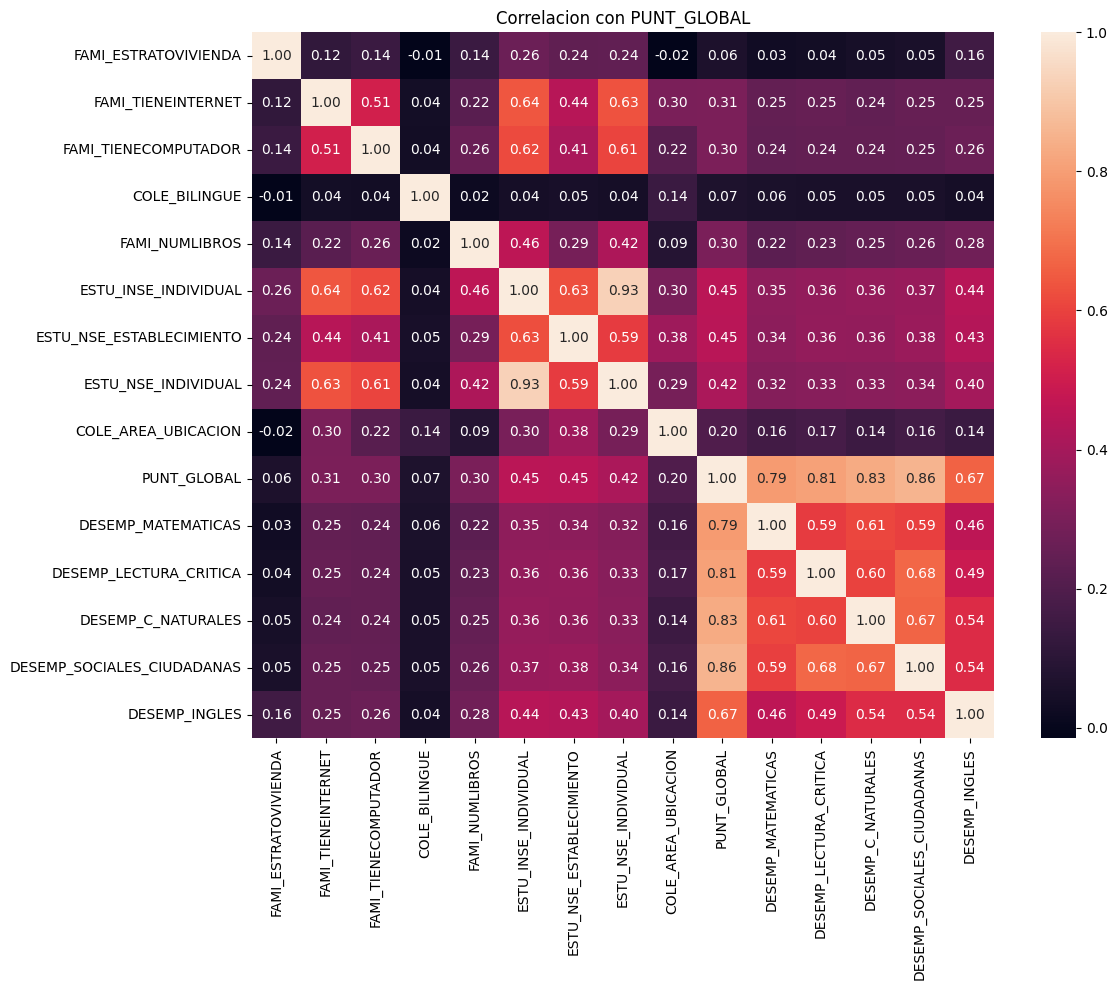

In [58]:
df_corr = df[columnas_relevantes].copy()

for col in df_corr.columns:
    if df_corr[col].dtype == 'object' or str(df_corr[col].dtype).startswith('category'):
        df_corr[col] = df_corr[col].astype('category').cat.codes

df_corr.dropna(inplace=True)

correlaciones = df_corr.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlaciones, annot=True, fmt=".2f")
plt.title("Correlacion con PUNT_GLOBAL")
plt.tight_layout()
plt.show()
        


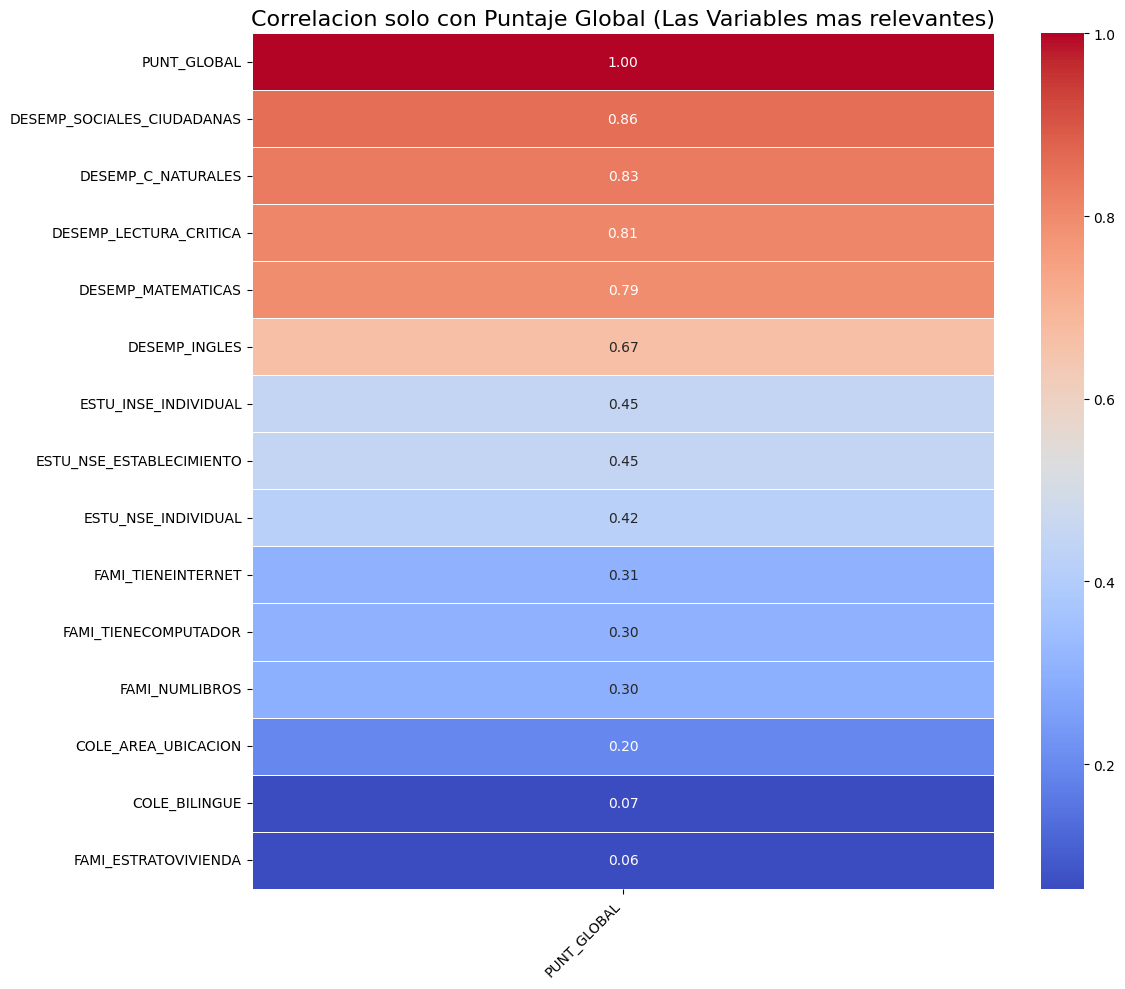

In [59]:
df_corr = df[columnas_relevantes].copy()

for col in df_corr.columns:
    if df_corr[col].dtype == 'object' or str(df_corr[col].dtype).startswith('category'):
        df_corr[col] = df_corr[col].astype('category').cat.codes

df_corr.dropna(inplace=True)

correlaciones = df_corr.corr() 
if 'PUNT_GLOBAL' in correlaciones:
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlaciones[['PUNT_GLOBAL']].sort_values(by='PUNT_GLOBAL', ascending=False),
                annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title('Correlacion solo con Puntaje Global (Las Variables mas relevantes)', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


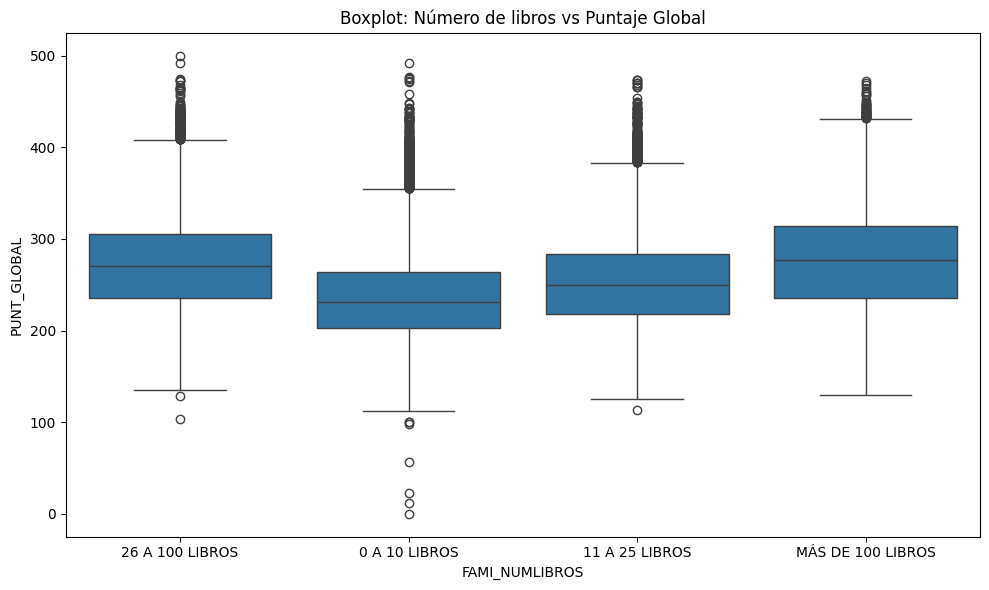

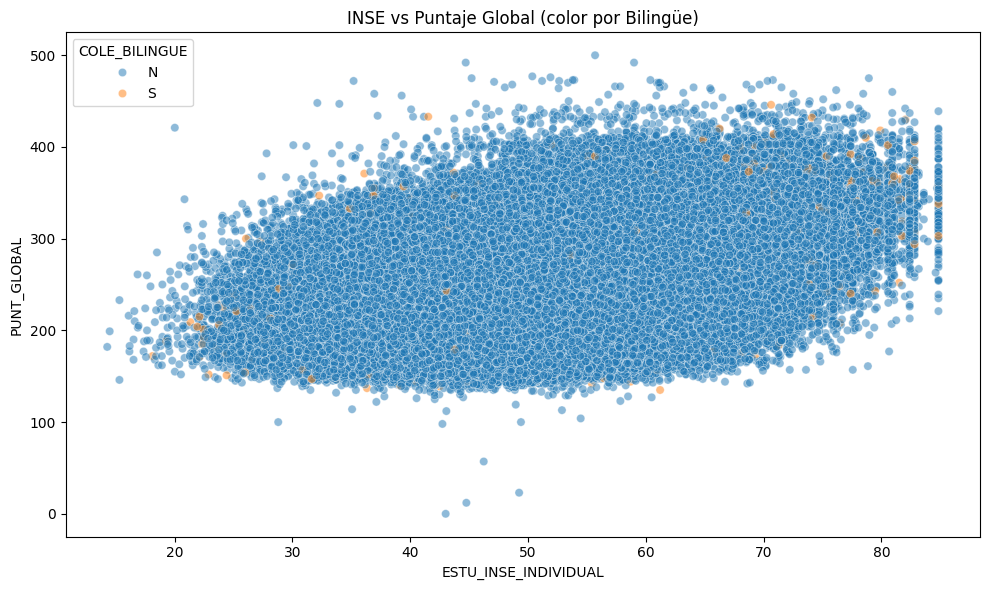

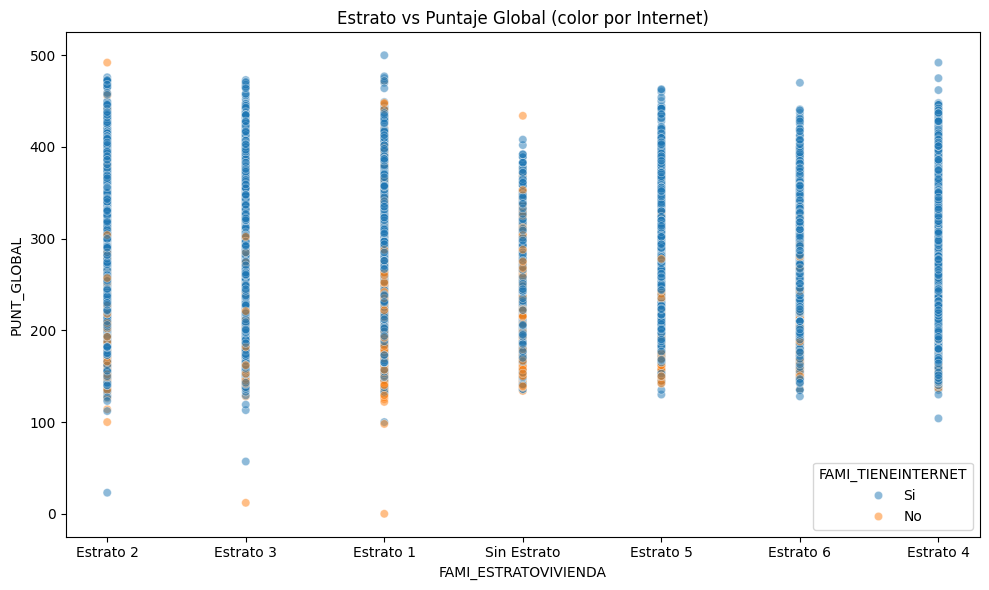

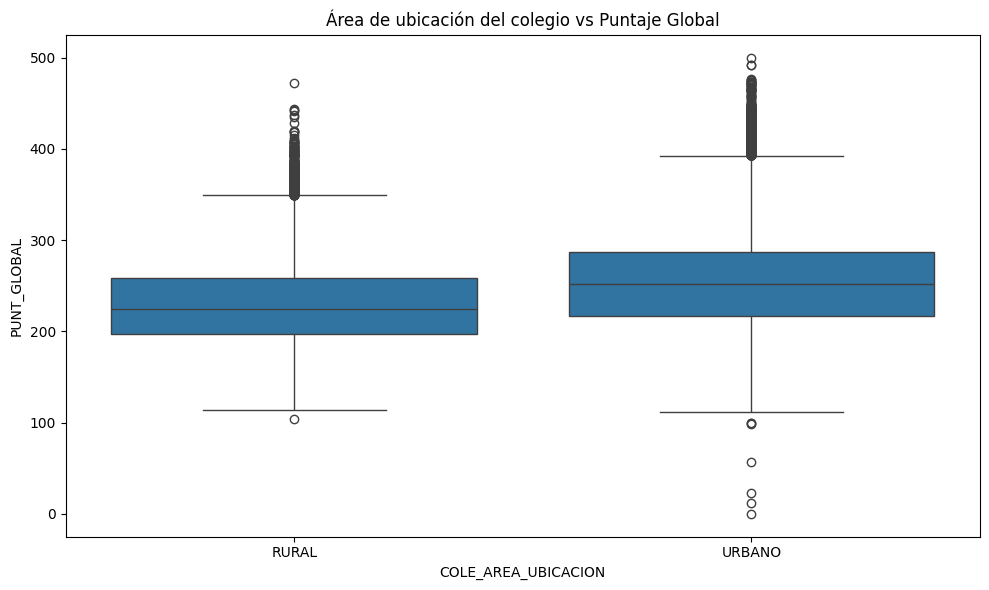

In [60]:
df_vis = df[columnas_relevantes].copy()
df_vis.dropna(inplace=True)

def agrupar_estrato(e):
    if e in [1, 2]: return 'Bajo'
    elif e in [3, 4]: return 'Medio'
    elif e in [5, 6]: return 'Alto'
    else: return 'Otro'
df_vis['estrato_grupo'] = df_vis['FAMI_ESTRATOVIVIENDA'].apply(agrupar_estrato)

df_vis['inse_tertil'] = pd.qcut(df_vis['ESTU_INSE_INDIVIDUAL'], q=3, labels=['Bajo','Medio','Alto'])

df_vis['internet_area'] = df_vis['FAMI_TIENEINTERNET'].astype(str) + "_" + df_vis['COLE_AREA_UBICACION'].astype(str)
df_vis['bilingue_estrato'] = df_vis['COLE_BILINGUE'].astype(str) + "_" + df_vis['estrato_grupo']
df_vis['internet_estrato'] = df_vis['FAMI_TIENEINTERNET'].astype(str) + "_" + df_vis['estrato_grupo']


def perfil_socioeco(row):
    estrato = row['FAMI_ESTRATOVIVIENDA']
    internet = row['FAMI_TIENEINTERNET']
    if estrato in [1, 2] and internet == 0:
        return 'Bajo'
    elif (estrato in [1, 2] and internet == 1) or (estrato in [3, 4] and internet == 0):
        return 'Medio-bajo'
    elif (estrato in [3, 4] and internet == 1) or (estrato in [5, 6] and internet == 0):
        return 'Medio-alto'
    elif estrato in [5, 6] and internet == 1:
        return 'Alto'
    else:
        return 'Otro'

df_vis['perfil_socioeco'] = df_vis.apply(perfil_socioeco, axis=1)


plt.figure(figsize=(10, 6))
sns.boxplot(x='FAMI_NUMLIBROS', y='PUNT_GLOBAL', data=df_vis)
plt.title('Boxplot: N√∫mero de libros vs Puntaje Global')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='ESTU_INSE_INDIVIDUAL', y='PUNT_GLOBAL', hue='COLE_BILINGUE', data=df_vis, alpha=0.5)
plt.title('INSE vs Puntaje Global (color por Biling√ºe)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='FAMI_ESTRATOVIVIENDA', y='PUNT_GLOBAL', hue='FAMI_TIENEINTERNET', data=df_vis, alpha=0.5)
plt.title('Estrato vs Puntaje Global (color por Internet)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='COLE_AREA_UBICACION', y='PUNT_GLOBAL', data=df_vis)
plt.title('√Årea de ubicaci√≥n del colegio vs Puntaje Global')
plt.tight_layout()
plt.show()


## Fase 3: abordar relaci√≥n variables-desempe√±o a trav√©s de un modelo

En esta fase propondr√°s, implementar√°s y reportar√°s el desempe√±o de uno o m√°s modelos (al menos uno predictivo) que busquen explicar las relaciones entre factores sociodemogr√°ficos y el desempe√±o en la prueba. Adem√°s, concluir√°s con respecto a la validez de al menos un modelo y los posibles hallazgos que se podr√≠an reportar para el *stakeholder*.

Pautas generales:

* Seleccionar variables y proponer modelos acordes a estas y al contexto del problema.
* Utilizar librer√≠as especializadas (ej., `statsmodels`, `sklearn`, etc.) para indagar sobre los aspectos que contribuyen al √©xito de los estudiantes. Los m√≥dulos correspondientes a regresi√≥n lineal y regresi√≥n log√≠stica pueden ser √∫tiles.
* Asegurar el cumplimiento de los supuestos y buenas pr√°cticas de cada modelo.
* Utilizar las m√©tricas de evaluaci√≥n de desempe√±o (disponibles en las librer√≠as especilizadas), para concluir sobre la validez de los modelos propuestos.

Preguntas gu√≠a:

* ¬øExiste alg√∫n sub-conjunto de variables socio-demogr√°ficas que explique razonablemente bien el desempe√±o de los estudiantes en la prueba?

In [61]:
variables_modelo = [
    'FAMI_NUMLIBROS', 'ESTU_NSE_INDIVIDUAL', 'ESTU_INSE_INDIVIDUAL',
    'FAMI_TIENEINTERNET', 'COLE_AREA_UBICACION',
    'DESEMP_LECTURA_CRITICA', 'DESEMP_MATEMATICAS',
    'DESEMP_C_NATURALES', 'DESEMP_SOCIALES_CIUDADANAS',
    'DESEMP_INGLES', 'PUNT_GLOBAL'
]

df_modelo = df[variables_modelo].copy()

for col in df_modelo.columns:
    if df_modelo[col].dtype == 'object':
        df_modelo[col] = df_modelo[col].fillna('Sin dato')
    else:
        df_modelo[col] = df_modelo[col].fillna(df_modelo[col].median())

for col in df_modelo.columns:
    if df_modelo[col].dtype == 'object' or str(df_modelo[col].dtype).startswith('category'):
        df_modelo[col] = df_modelo[col].astype('category').cat.codes

X = df_modelo.drop(columns='PUNT_GLOBAL')
y = df_modelo['PUNT_GLOBAL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)


y_pred = modelo.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("üìä Evaluaci√≥n del modelo de regresi√≥n lineal:")
print(f"‚Üí R¬≤ (explicaci√≥n de la varianza): {r2:.3f}")
print(f"‚Üí RMSE (error promedio en puntaje): {rmse:.2f}")



üìä Evaluaci√≥n del modelo de regresi√≥n lineal:
‚Üí R¬≤ (explicaci√≥n de la varianza): 0.950
‚Üí RMSE (error promedio en puntaje): 11.03


## Fase 4

Deber√°s elegir y realizar una de las dos alternativas que se encuentran a continuaci√≥n.

### Alternativa 1: desarrollar una herramienta interactiva de an√°lisis

En esta fase desarrollar√°s, a partir de alguno de los an√°lisis realizados, una herramienta interactiva que sea relevante en el contexto del problema, acompa√±ada de las instrucciones necesarias para que un usuario la pueda utilizar.

Pautas generales:

* Seleccionar uno de los an√°lisis previos que pueda verse enriquecido con alguna caracter√≠stica de interactividad.
* Seleccionar el/los par√°metro(s) que el usuario podr√° cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acci√≥n del usuario.
* Utilizar una librer√≠a especializada (ej., `ipywidgets`, `panel`, etc.) para implementar la herramienta.

Preguntas gu√≠a:

* ¬øCu√°l o cu√°les preguntas podr√° hacerle el usuario a la herramienta y c√≥mo aporta la respuesta al an√°lisis?
* ¬øQu√© aprendizajes clave puede explorar u obtener el usuario con esta herramienta?

In [ ]:
# Implementa tu respuesta en esta celda}


### Alternativa 2: registrar en bases de datos relacionales con PySpark

En esta fase desarrollar√°s, a partir de alguno de los an√°lisis realizados, un _script_ que sea relevante en el contexto del problema, acompa√±ado de las instrucciones necesarias para que un usuario lo pueda ejecutar.

Pautas generales:

* Cargar en una base de datos relacional (tipo SQL) el segmento de los datos sobre el cual profundizaste en tu an√°lis, utilizando una tabla distinta para cada categor√≠a de campos. Por ejemplo, una categor√≠a puedes ser informaci√≥n del colegio; en cuyo caso, una tabla deber√≠a contener un registro √∫nico para cada colegio y todos los campos asociados.

* Los campos, a excepci√≥n de los identificadores, deben existir en un √∫nica tabla.

* Cada registro debe existir una √∫nica vez en su respectiva tabla.

* Cada registro debe tener un identificador √∫nico en su tabla, el cual establece una relaci√≥n entre tablas.

* Seleccionar uno de los modelos predictivos implementados.

* Crear en la base de datos relacional una tabla que contenga √∫nicamente los identificadores del registro y la predicci√≥n de la variable de respuesta hecha por el modelo.

* Desarrollar _queries_ de SQL seg√∫n las siguientes indicaciones y concluir acerca de los resultados:
    * Un _query_ que seleccione todos registros y los agregue en una √∫nica tabla. Para esto debes relacionar las tablas por su identificador, utilizando el m√©todo `JOIN`.
    * Un _query_ que contenga el puntaje promedio de los estudiantes, agrupado por a√±o y por colegio.
    * Distintos _queries_ que calculen medidas de error de predicci√≥n del modelo a partir de los datos reales y las predicciones respectivas. Debes reportar el error para cada registro, el error total de los registros de entrenamiento y el error total de los registros de prueba.
    * Haz dos _queries_ adicionales que resulten interesantes.

Preguntas gu√≠a:

* ¬øC√≥mo aporta la segmentaci√≥n de los datos en categor√≠as de campos al manejo de los datos?
* ¬øQu√© filtros y agrupaciones podemos aplicar sobre los datos con el fin de obtener informaci√≥n relevante?

In [ ]:
# Implementa tu respuesta en esta celda


## Referencias

*  J. VanderPlas (2016) *Python Data Science Handbook: Essential Tools for Working with Data* O'Reilly Media, Inc.
*  scikit-learn developers . (2020). Demo of DBSCAN clustering algorithm. 11 Diciembre 2020, de scikit-learn <br> https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

## Cr√©ditos

__Autores__: Camilo Hernando G√≥mez Castro, Alejandro Mantilla Redondo, Jose Fernando Barrera de Plaza, Diego Alejandro Cely G√≥mez.

__Fecha √∫ltima actualizaci√≥n__: 29/09/2022